# Logarithm Transformation as an Approximation of Percentage Lift
Julian Hsu
27-Sept-2023

**Reminder that $\beta$ from log(y) = B * W doesn't estimate the ROI.** Except for edge cases, the ROI estimate is exp(B)-1. You can derive this with algebra, and you can find it at my notebook here. 


The algebra below:
\begin{align}
Y &= Y_0 B*W & (\text{True DGP}) \\
\\
log(Y) &= \beta_0 + \beta_1 W  & (\text{Estimating Equation} )\\
\end{align}

Note that when $W=0$, then $Y = Y_0$ and $log(Y) = \beta_0, \text{ therefore, } \Rightarrow Y_0 = exp[\beta_0]$

So when $W=1$:
\begin{align}
Y_0 (1+B) & = exp[\beta_0 + \beta_1]\\
Y_0 (1+B) & = exp[\beta_0] \times exp[\beta_1] & \text{ by law of exponents} \\
exp[\beta_0] (1+B) & = exp[\beta_0] \times exp[\beta_1] & \text{ subbing in above} \\
(1+B) & = exp[\beta_1] 
\end{align}
Therefore, $B = exp[\beta] - 1$. You can get the standard error via the [Delta method](https://en.wikipedia.org/wiki/Delta_method). So the standard error is now $= se(\beta) * exp(se(\beta))$. 


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


## DGP and Estimation Function
We will create two different DGPs. The first is where the outcome is linear in treatment, and the second follows a Cobb-Douglas function.

In [83]:
def dgp_linear(N=1000, treatment_perc=0.50, scale=1):
    y0 = np.random.uniform(1,5, N)*scale 
    w = np.random.choice(2,N)
    treatment_effect = w*treatment_perc*y0
    y_observed = y0 + treatment_effect 
    return pd.DataFrame(data={'y':y_observed, 'w':w})
    
    
def dgp_cobbdouglas(N=1000, treatment_perc=0.50, scale=1):
    w = np.random.choice(2,N)
    x = np.random.normal(0,1, N) + treatment_perc*w
    y_observed = np.exp(x)
    return pd.DataFrame(data={'y':y_observed, 'w':w})
    

In [38]:
def ols_estimate(data=None):a
    ols_result = sm.OLS(yy,X).fit()
    coef_ = ols_result.params['w']
    se_ = ols_result.bse['w']
    return coef_, se_

In [47]:
df_results= pd.DataFrame()
for sim in range(100):
    df = dgp_linear(scale=s_)
    coef_,se_ = ols_estimate(data=df)
    df_results= pd.concat([df_results, pd.DataFrame(index=[sim],data={'coef':coef_
                                                         ,'se':se_
                                                        ,'corrected_coef':np.exp(coef_)-1
                                                        ,'func':'linear'})  ])
    df = dgp_cobbdouglas(scale=s_)
    coef_,se_ = ols_estimate(data=df)
    df_results= pd.concat([df_results, pd.DataFrame(index=[sim],data={'coef':coef_
                                                         ,'se':se_
                                                        ,'func':'cobbdouglas'})  ])    

In [49]:
plot_ = df_results.groupby('func').mean()

In [103]:
from sklearn import metrics

Text(0.5, 1.0, 'Model: $ln(Y) = \\hat{\\beta_0} + \\hat{\\beta_1} W$')

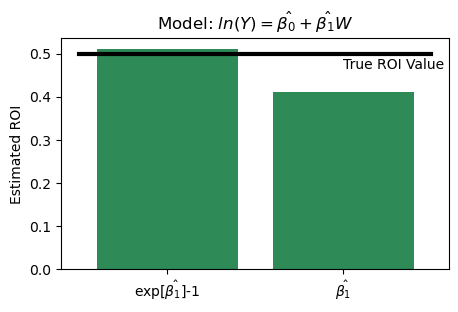

In [121]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,3))
ax.bar([r'exp[$\hat{\beta_1}$]-1', r'$\hat{\beta_1}$' ]
        , [plot_['corrected_coef'].mean() , plot_['coef'].values.tolist()[-1]] 
      , color='seagreen')
ax.plot([-0.5,1.5], [0.5]*2, color='black', linewidth=3)
ax.text(x=1,y=0.465,s='True ROI Value')
ax.set_ylabel('Estimated ROI')
ax.set_title(r'Model: $ln(Y) = \hat{\beta_0} + \hat{\beta_1} W$')

Text(0, 0.5, 'Estimate')

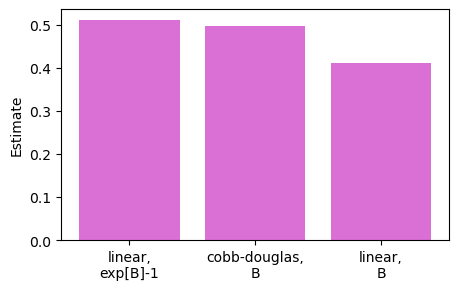

In [82]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,3))
ax.bar(['linear,\nexp[B]-1', 'cobb-douglas,\nB', 'linear,\nB' ]
        , [plot_['corrected_coef'].mean()] + plot_['coef'].values.tolist() 
      , color='orchid')
ax.set_ylabel('Estimate')